In [163]:
!pip install researchpy

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [165]:
# f1_ada score:  [0.79659203 0.79117148 0.78327172 0.7430033  0.79947187 0.76996621]
# f1_ada score mean:  0.7805794339114768
# precision_ada score:  [0.78991477 0.78711467 0.79555012 0.76523676 0.80396882 0.75772662]
# precision_ada score mean:  0.7832519605156817
# recall_ada score:  [0.8212503  0.82568735 0.7775929  0.73781792 0.83234292 0.80346248]
# recall_ada score mean:  0.7996923117555398
# --------------------------------------------------------------------------------------------------------
# f1_rfc score:  [0.95953752 0.95949366 0.95558579 0.96642287 0.96233871 0.96163678]
# f1_rfc score mean:  0.9608358878816649
# precision_rfc score:  [0.96453968 0.96503441 0.96226212 0.96992377 0.96691788 0.96637833]
# precision_rfc score mean:  0.9658426975965386
# recall_rfc score:  [0.96450361 0.96478092 0.96200776 0.96997068 0.96672213 0.96652405]
# recall_rfc score mean:  0.9657515252357182
# --------------------------------------------------------------------------------------------------------
# f1_NB score:  [0.52133782 0.52180424 0.51735696 0.52656009 0.52120134 0.52546639]
# f1_NB score mean:  0.5222878081253123
# precision_NB score:  [0.84244627 0.83738081 0.83597765 0.84468576 0.84127816 0.83946602]
# precision_NB score mean:  0.8402057799427798
# recall_NB score:  [0.43819824 0.44081293 0.43601933 0.44425957 0.44057523 0.44326915]
# recall_NB score mean:  0.44052240974037976
# --------------------------------------------------------------------------------------------------------
# f1_NNMLP score:  [0.98578086 0.98420407 0.98492088 0.9851898  0.98422004 0.98605739]
# f1_NNMLP score mean:  0.9850621723620798
# precision_NNMLP score:  [0.98590161 0.9843013  0.98492509 0.9851494  0.98436781 0.9861752 ]
# precision_NNMLP score mean:  0.9851367333480189
# recall_NNMLP score:  [0.98573806 0.98435148 0.98522304 0.98538151 0.98411378 0.98597575]
# recall_NNMLP score mean:  0.985130602435095
# --------------------------------------------------------------------------------------------------------
# f1_svc score:  [0.98500915 0.98449518 0.98454848 0.98556398 0.98556703 0.98572289]
# f1_svc score mean:  0.9851511190895382
# precision_svc score:  [0.98545933 0.98505418 0.98513597 0.98593992 0.98610207 0.98605225]
# precision_svc score mean:  0.9856239527585725
# recall_svc score:  [0.98569844 0.98530227 0.98534189 0.98625307 0.98625307 0.9863323 ]
# recall_svc score mean:  0.9858635079100969

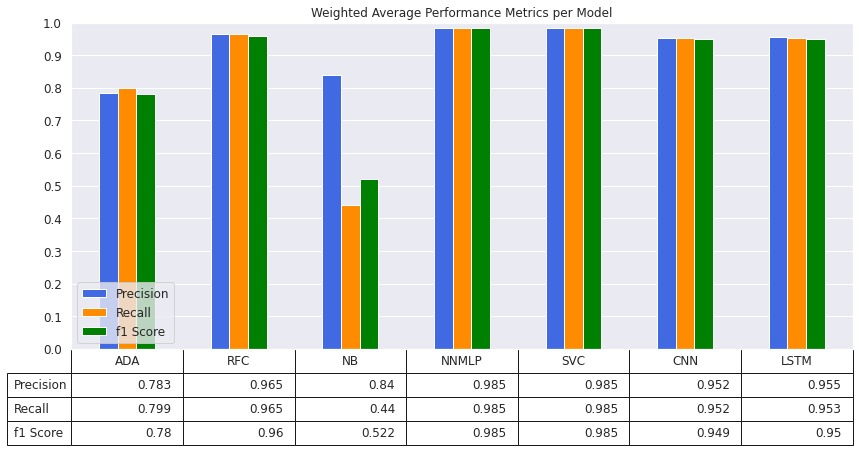

In [179]:
precision = [0.783,0.965,0.840,0.985,0.985,0.952,0.955]
recall =    [0.799,0.965,0.440,0.985,0.985,0.952,0.953]
f1_score =  [0.780,0.960,0.522,0.985,0.985,0.949,0.950]
index = ['ADA','RFC','NB','NNMLP','SVC','CNN','LSTM']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df = pd.DataFrame({'Precision':precision,
                   'Recall':recall,
                   'f1 Score':f1_score
                  },
                  index=index)

ax = df.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            table=True,
            title=('Weighted Average Performance Metrics per Model'),
            color={"Precision": "royalblue", "Recall": "darkorange",'f1 Score':'green'})

h,l = ax.get_legend_handles_labels()
ax.legend(h[:3],["Precision", "Recall", "f1 Score"], loc=3, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

In [167]:
import researchpy as rp
rp.summary_cont(df)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Precision,7.0,0.9236,0.0794,0.0300,0.8502,0.9970
1,Recall,7.0,0.8684,0.1996,0.0754,0.6838,1.0530
2,f1 Score,7.0,0.8759,0.1713,0.0648,0.7174,1.0343


In [168]:
stack_df = df.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'models',
                                    'level_1': 'metric',
                                    0:'score'},)
display(stack_df)

,models,metric,score
0,ADA,Precision,0.783
1,ADA,Recall,0.799
2,ADA,f1 Score,0.780
3,RFC,Precision,0.965
4,RFC,Recall,0.965
5,RFC,f1 Score,0.960
6,NB,Precision,0.840
7,NB,Recall,0.440
8,NB,f1 Score,0.522
9,NNMLP,Precision,0.985


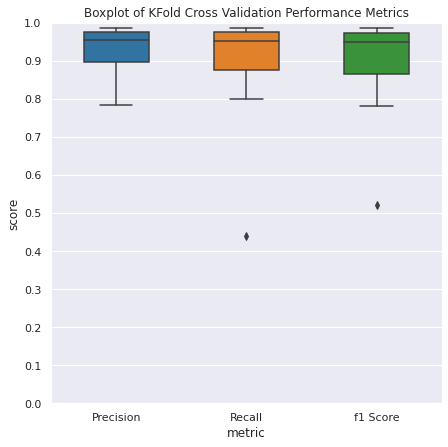

In [169]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y=stack_df["score"], x=stack_df["metric"],width=0.5,palette=("tab10"))
ax.set_title('Boxplot of KFold Cross Validation Performance Metrics')
ax.set_ylim(0.0,1.0)
ax.set_yticks(ticks=ticks,minor=False)

In [170]:
import numpy as np
import scipy.stats as stats
# to check
# Confidence interval
confidence_level = 0.95
# If juste samples (not mean) the dof is 
mean_list, std_list, ci_list = [], [], []
for col_name  in df:
    col_values = df[col_name].values
    sample_size = len(col_values)
    degrees_freedom = sample_size - 1
    sample_mean = np.mean(col_values)
    # Standard error of the mean (SEM) = sigma / sqrt(n)
    sample_standard_error = stats.sem(col_values)
    print('sample_standard_error s^2=', sample_standard_error,
         'or s/np.sqrt(n_t)', np.std(col_values)/np.sqrt(sample_size),  np.std(col_values))
    confidence_interval = stats.t.interval(alpha=confidence_level,
                                           df=degrees_freedom,
                                           loc=sample_mean,
                                           scale=sample_standard_error)
    std_list.append(sample_standard_error)
    ci_list.append(confidence_interval)
    mean_list.append(sample_mean)
    
CI_df = pd.DataFrame([df.columns.values, mean_list, std_list,  ci_list]).transpose()
CI_df.columns = ['metric',
                 'mean',
                 'std error',
                 'CI']
CI_df.loc[:,'CI'] =  CI_df.loc[:,'CI'].map(lambda x: (x[0].round(2), x[1].round(2)))
CI_df = CI_df.sort_values(by=['mean'])
display(CI_df)

sample_standard_error s^2= 0.030001473886696783 or s/np.sqrt(n_t) 0.027775967547105214 0.07348830255384114
sample_standard_error s^2= 0.07543709367440407 or s/np.sqrt(n_t) 0.06984117759218808 0.18478238718082654
sample_standard_error s^2= 0.06476235994237796 or s/np.sqrt(n_t) 0.05995829454335825 0.15863473639728698


,metric,mean,std error,CI
1,Recall,0.868429,0.0754371,"(0.68, 1.05)"
2,f1 Score,0.875857,0.0647624,"(0.72, 1.03)"
0,Precision,0.923571,0.0300015,"(0.85, 1.0)"


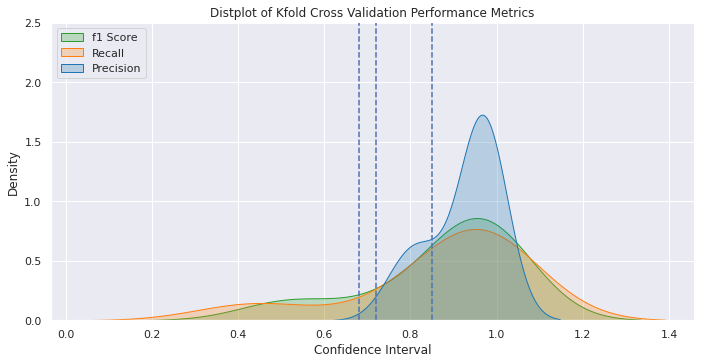

In [171]:
graph = sns.displot(stack_df, x='score', hue='metric', kind="kde", fill=True,height=5,aspect=2,legend=False,palette=("tab10"))
plt.title('Distplot of Kfold Cross Validation Performance Metrics')
plt.ylim(0,2.5)
plt.xlabel('Confidence Interval')
graph.ax.legend(labels=['f1 Score','Recall','Precision'],loc=2)
for CI in CI_df['CI'].values:
    plt.axvline(CI[0],  linestyle='--')
plt.show()

In [172]:
from scipy.stats import shapiro
for col, val in df.iteritems():
    print(col)
    stat, p = shapiro(val)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

Precision
Statistics=0.779, p=0.025
Recall
Statistics=0.662, p=0.001
f1 Score
Statistics=0.704, p=0.004


In [173]:
stats.levene(*[df[i] for i in df.columns])

LeveneResult(statistic=0.2821414258360422, pvalue=0.7574412522256937)

In [174]:
df=df.transpose()

In [175]:
import scipy.stats as stats
F, p = stats.f_oneway(*[df[i] for i in df.columns])
print(f'F= {F}, p={p}')

F= 9.799156055303209, p=0.00024250794973259846


In [176]:
# ANOVA the hard way
# n1 = n2 = n3 
k = len(df.iloc[0]) # Number of columns
list_n = df.count().values
n = np.sum(df.count().values) # Total number of observations

# sum all value from all groups and divide it by sum of observation from all (the three) samples
CM = (df.sum().sum())**2 / n 
# print('CM', CM)
# total SS 
TSS = (df**2).sum().sum() - CM
dof_tss = n - 1

# SST between
SST = ((df.sum()**2).values / list_n).sum() - CM
dof_sst = k - 1
MST = SST / dof_sst 
# SSE within
SSE = TSS - SST
dof_mse = n - k
MSE = SSE / dof_mse

# Test statistic
F = MST/ MSE
# p-value
p = stats.f.sf(F, dof_sst, dof_mse)

# Eta 
et_sq = SST / TSS
# Omega squared 
om_sq = SST - (dof_sst * MSE) / (TSS + MSE)

print('SST', SST, 'dof', dof_sst,'MST', MST)
print('SSE', SSE, 'dof', dof_mse,'MSE', MSE)
print('TSS', TSS, 'dof', dof_tss, 'F', F)
print('p value', p)
print('eta squared', et_sq, 'omega_sqaured', om_sq)

SST 0.37597961904761945 dof 6 MST 0.06266326984126991
SSE 0.08952666666666431 dof 14 MSE 0.0063947619047617366
TSS 0.46550628571428376 dof 20 F 9.799156055303468
p value 0.00024250794973256453
eta squared 0.8076789306307809 omega_sqaured 0.2946732273323282


In [177]:
# CHECK THE RESULTS of DF in analys variance table.
# F stat and pvalue from statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Reform the dataframe 
stack_df = df.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'id',
                                    'level_1': 'metric',
                                    0:'score'})
# print(df_2)

mod = ols('score ~ metric', data=stack_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

# et_sq = SST / TSS
et_sq = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print('et_sq', et_sq)

            sum_sq    df         F    PR(>F)
metric    0.375980   6.0  9.799156  0.000243
Residual  0.089527  14.0       NaN       NaN
et_sq 0.8076789306307766


In [178]:
# Tukey multi comparison method
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stack_df['score'],
                            stack_df['metric'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   ADA    CNN   0.1637 0.2283 -0.0593  0.3866  False
   ADA   LSTM   0.1653 0.2196 -0.0576  0.3883  False
   ADA     NB  -0.1867 0.1303 -0.4096  0.0363  False
   ADA  NNMLP   0.1977 0.0983 -0.0253  0.4206  False
   ADA    RFC    0.176 0.1703  -0.047   0.399  False
   ADA    SVC   0.1977 0.0983 -0.0253  0.4206  False
   CNN   LSTM   0.0017    0.9 -0.2213  0.2246  False
   CNN     NB  -0.3503 0.0015 -0.5733 -0.1274   True
   CNN  NNMLP    0.034    0.9  -0.189   0.257  False
   CNN    RFC   0.0123    0.9 -0.2106  0.2353  False
   CNN    SVC    0.034    0.9  -0.189   0.257  False
  LSTM     NB   -0.352 0.0014  -0.575  -0.129   True
  LSTM  NNMLP   0.0323    0.9 -0.1906  0.2553  False
  LSTM    RFC   0.0107    0.9 -0.2123  0.2336  False
  LSTM    SVC   0.0323    0.9 -0.1906  0.2553  False
    NB  NNMLP   0.3843  0.001  0.1614  0.6073 